# Trabalho Prático - Fase 2: Clusterização

**Alunos:**  
Isabelle Fernandes de Oliveira   
Lucas Dayrell de Andrade Machado   

## 1. Contexto escolhido e sua relevância
O aumento global nos índices de obesidade tornou-se uma das principais preocupações de saúde pública nas últimas décadas. A obesidade está associada a diversas doenças crônicas, como diabetes tipo 2, hipertensão e problemas cardiovasculares. Com a crescente disponibilidade de dados relacionados a hábitos alimentares e estilos de vida, torna-se possível aplicar técnicas de mineração de dados para identificar padrões relevantes associados ao ganho de peso e perfis de risco.

O dataset Obesity Prediction, disponível no Kaggle *<https://www.kaggle.com/datasets/ruchikakumbhar/obesity-prediction?resource=download>*, reúne informações demográficas, comportamentais e nutricionais de indivíduos. Esse banco de dados oferece uma excelente oportunidade para aplicar técnicas de clusterização, permitindo a segmentação da população em grupos com características semelhantes, o que pode facilitar intervenções mais eficazes na prevenção e tratamento da obesidade.

## 2. Recursos disponíveis, requisitos, suposições, restrições, riscos e contingências

**Recursos disponíveis:**   
- Dataset "Obesity Prediction" do Kaggle.  
- Software Python 3.12.4.   
- Pacotes: pandas, seaborn, sklearn, hdbscan, matplotlib.pyplot
- RStudio: Ambiente integrado de desenvolvimento (IDE) para programação em R.   
- Conhecimentos prévios sobre análise de dados e clusterização.   

**Requisitos:**   
- Realizar a preparação e tratamento dos dados.   
- Aplicar e comparar algoritmos de clusterização (como K-means, DBSCAN, Hierarchical Clustering).   
- Avaliar a coesão dos clusters utilizando métricas de avaliação dos agrupamentos.

**Suposições:**   
- Os dados são representativos e confiáveis.   
- As variáveis fornecidas possuem relação direta com a obesidade.   

**Restrições:**   
- O dataset é limitado a variáveis auto-relatadas, o que pode introduzir viés.   
- O projeto será desenvolvido sem apoio de especialistas da área da saúde.   

**Riscos e contingências:**   
- Risco 1: a clusterização pode não gerar grupos claramente distintos.      
- Contingência 1: testar diferentes algoritmos e métodos de pré-processamento.   
- Risco 2: dados ausentes ou inconsistentes.   
- Contingência 2: exclusão do registro   

## 3. Objetivos da mineração de dados, detalhamento da tarefa e critérios de sucesso (Tarefa 1.3)

**Objetivo:**   
- Segmentar indivíduos, por meio da aplicação de técnicas não supervisionadas (clusterização), com base em características relacionadas à obesidade, como hábitos alimentares, atividade física e dados demográficos, a fim de identificar perfis de risco distintos.   
- Aplicar e comparar algoritmos de clusterização (como K-means, DBSCAN,Hierarchical Clustering).   

**Tarefa de Mineração de Dados:**   
1. Limpeza de dados.   
2. Codificação de valores categóricos.      
3. Padronização de variáveis numéricas.      
4. Possível aplicação de Análise de Componentes Principais (PCA).      
5. Utilização de algoritmos de agrupamento (K-means, DBSCAN, Hierarchical Clustering).      
6. Avaliar a coesão dos clusters utilizando métricas de avaliação dos agrupamentos.   
7. Comparar os resultados obtidos pelos diferentes algorítmos.   


**Critérios de sucesso:**   
- Clusters com alta separabilidade (baixa sobreposição entre grupos).      
- Grupos que podem ser interpretados e relacionados ao risco de obesidade.    


## 4. Descrição do projeto
O projeto consiste em aplicar técnicas de mineração de dados com foco em clusterização para analisar o dataset Obesity Prediction. O objetivo é agrupar os indivíduos com base em seus hábitos de vida e características demográficas, com o intuito de identificar perfis distintos de risco para a obesidade. Serão testados diferentes algoritmos de clusterização, e os resultados serão avaliados com base em métricas quantitativas e qualitativas.

## 5. Descrição e exploração dos dados
O dataset Obesity Prediction contém 2.111 linhas e 17 colunas. Cada linha representa o registro de indivíduos com as variáveis relacionadas a saúde e hábitos alimentares.

In [193]:
import pandas as pd

df = pd.read_csv("Obesity prediction.csv", sep=",")
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          2111 non-null   object 
 1   Age             2111 non-null   float64
 2   Height          2111 non-null   float64
 3   Weight          2111 non-null   float64
 4   family_history  2111 non-null   object 
 5   FAVC            2111 non-null   object 
 6   FCVC            2111 non-null   float64
 7   NCP             2111 non-null   float64
 8   CAEC            2111 non-null   object 
 9   SMOKE           2111 non-null   object 
 10  CH2O            2111 non-null   float64
 11  SCC             2111 non-null   object 
 12  FAF             2111 non-null   float64
 13  TUE             2111 non-null   float64
 14  CALC            2111 non-null   object 
 15  MTRANS          2111 non-null   object 
 16  Obesity         2111 non-null   object 
dtypes: float64(8), object(9)
memory u

In [194]:
df.head(10)

,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II
5,Male,29.0,1.62,53.0,no,yes,2.0,3.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Automobile,Normal_Weight
6,Female,23.0,1.50,55.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,0.0,Sometimes,Motorbike,Normal_Weight
7,Male,22.0,1.64,53.0,no,no,2.0,3.0,Sometimes,no,2.0,no,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
8,Male,24.0,1.78,64.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,1.0,Frequently,Public_Transportation,Normal_Weight
9,Male,22.0,1.72,68.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,1.0,1.0,no,Public_Transportation,Normal_Weight


O que cada coluna representa está descrito abaixo:   
- Gender: Sexo   
- Age: Idade   
- Height : Altura em metros   
- Weight : peso em kg   
- family_history : Algum membro da família sofreu ou sofre de sobrepeso?   
- FAVC : Você come alimentos com alto teor calórico com frequência?   
- FCVC : Você costuma comer vegetais em suas refeições?   
- NCP : Quantas refeições principais você faz diariamente?   
- CAEC : Você come algum alimento entre as refeições?   
- SMOKE : Você fuma?   
- CH2O : Quanta água você bebe diariamente?   
- SCC : Você monitora as calorias que ingere diariamente?   
- FAF: Com que frequência você pratica atividade física?   
- TUE : Quanto tempo você usa dispositivos tecnológicos como celular, videogame, televisão, computador e outros?   
- CALC : Com que frequência você consome bebidas alcoólicas?   
- MTRANS : Qual meio de transporte você costuma usar?   
- Obesity_level : Nível de obesidade

In [195]:
qtde_registro_NA = df.isna().any(axis=1).sum()
print(f"Quantidade de registros com alguma coluna NA: {qtde_registro_NA}")

Quantidade de registros com alguma coluna NA: 0


Como pode ser visto, no dataset não há dados faltantes. Para todas as linhas, todas as colunas estão devidamente preenchidas.
Abaixo, segue a frequência dos registros para cada feature:

In [196]:
print(df.describe())
categorical_cols = df.select_dtypes(include='object').columns

               Age       Height       Weight         FCVC          NCP  \
count  2111.000000  2111.000000  2111.000000  2111.000000  2111.000000   
mean     24.312600     1.701677    86.586058     2.419043     2.685628   
std       6.345968     0.093305    26.191172     0.533927     0.778039   
min      14.000000     1.450000    39.000000     1.000000     1.000000   
25%      19.947192     1.630000    65.473343     2.000000     2.658738   
50%      22.777890     1.700499    83.000000     2.385502     3.000000   
75%      26.000000     1.768464   107.430682     3.000000     3.000000   
max      61.000000     1.980000   173.000000     3.000000     4.000000   

              CH2O          FAF          TUE  
count  2111.000000  2111.000000  2111.000000  
mean      2.008011     1.010298     0.657866  
std       0.612953     0.850592     0.608927  
min       1.000000     0.000000     0.000000  
25%       1.584812     0.124505     0.000000  
50%       2.000000     1.000000     0.625350  
75% 

In [197]:
for col in categorical_cols:
    print(f"\nFrequência da variável '{col}':")
    print(df[col].value_counts())


Frequência da variável 'Gender':
Gender
Male      1068
Female    1043
Name: count, dtype: int64

Frequência da variável 'family_history':
family_history
yes    1726
no      385
Name: count, dtype: int64

Frequência da variável 'FAVC':
FAVC
yes    1866
no      245
Name: count, dtype: int64

Frequência da variável 'CAEC':
CAEC
Sometimes     1765
Frequently     242
Always          53
no              51
Name: count, dtype: int64

Frequência da variável 'SMOKE':
SMOKE
no     2067
yes      44
Name: count, dtype: int64

Frequência da variável 'SCC':
SCC
no     2015
yes      96
Name: count, dtype: int64

Frequência da variável 'CALC':
CALC
Sometimes     1401
no             639
Frequently      70
Always           1
Name: count, dtype: int64

Frequência da variável 'MTRANS':
MTRANS
Public_Transportation    1580
Automobile                457
Walking                    56
Motorbike                  11
Bike                        7
Name: count, dtype: int64

Frequência da variável 'Obesity':
Obesi

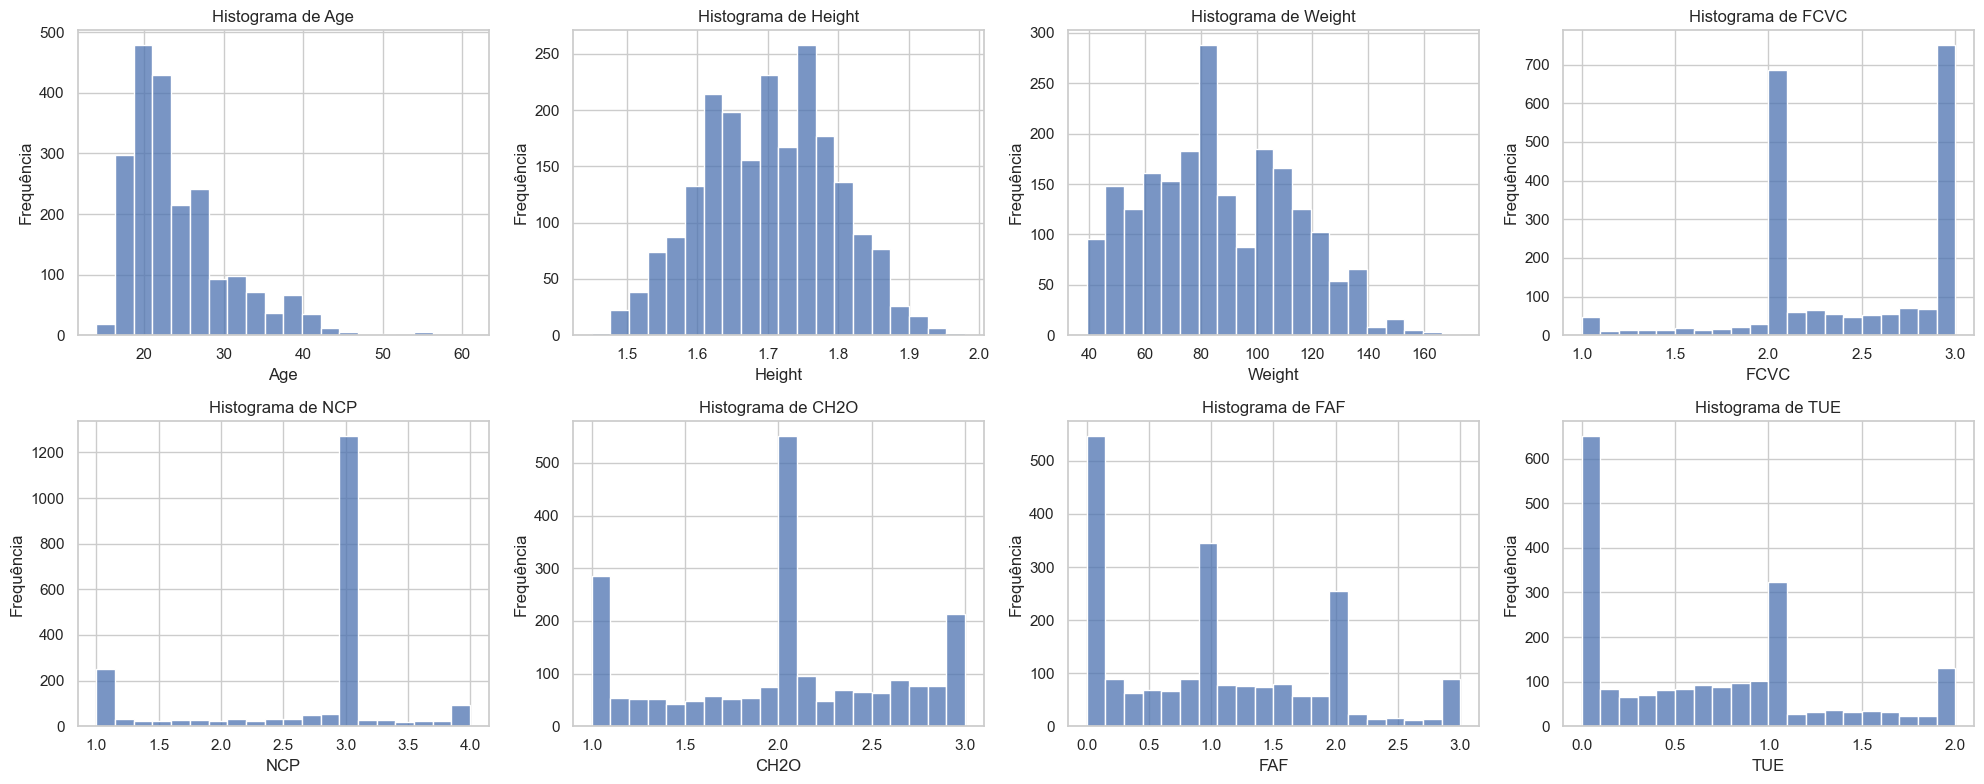

In [198]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

numeric_cols = df.select_dtypes(include='number').columns
num_cols = len(numeric_cols)

# Defina quantas colunas no grid (ex: 3)
cols = 4
rows = (num_cols + cols - 1) // cols  # calcula o número de linhas necessárias

fig, axes = plt.subplots(rows, cols, figsize=(cols*5, rows*4))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    sns.histplot(data=df, x=col, bins=20, kde=False, ax=axes[i])
    axes[i].set_title(f"Histograma de {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Frequência")

# Remover subplots vazios, se houver
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

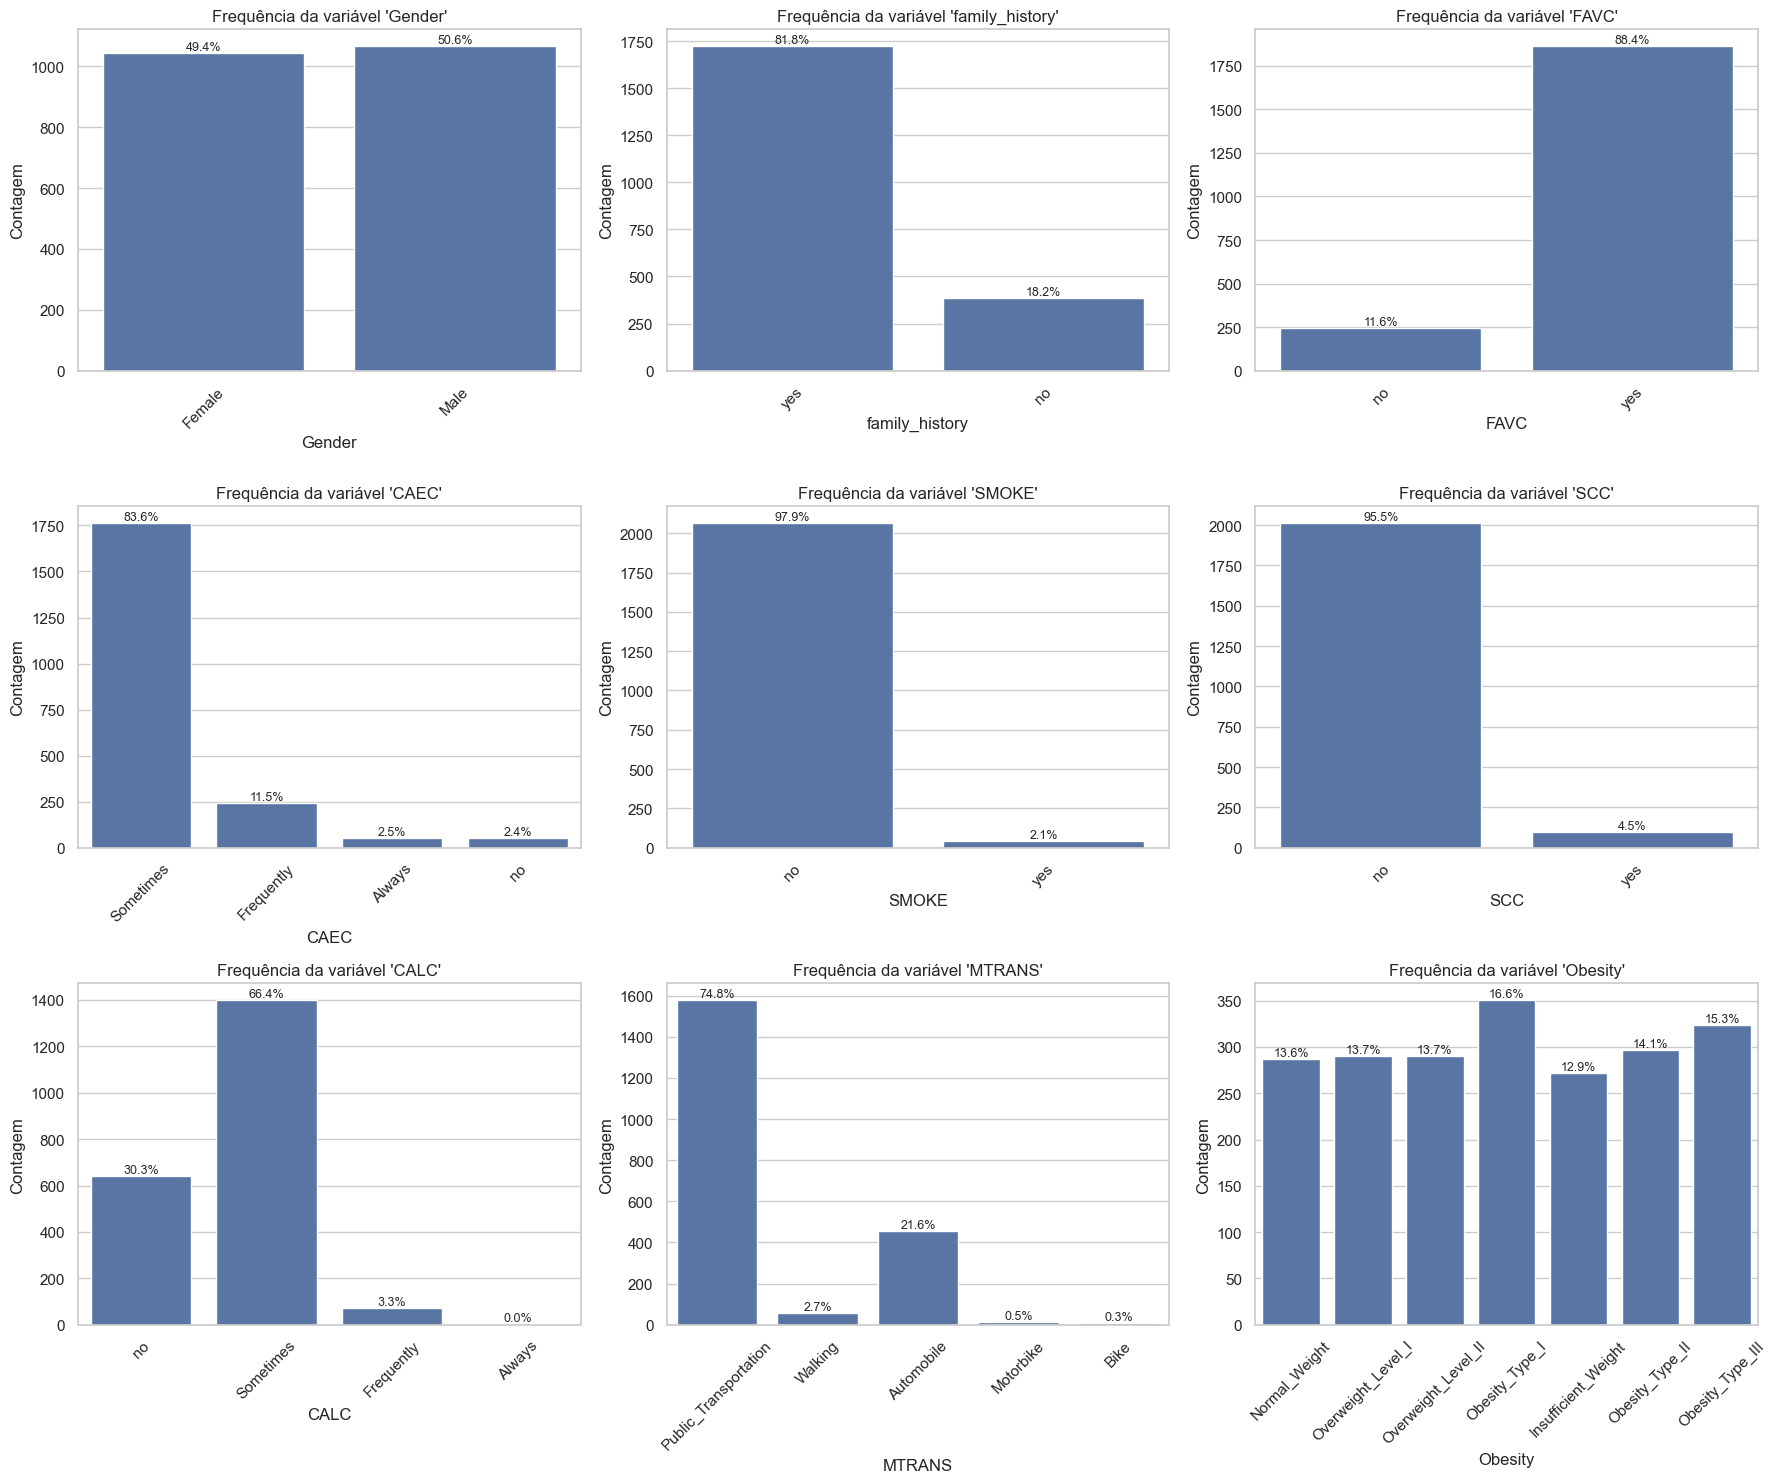

In [199]:
sns.set(style="whitegrid")

categorical_cols = df.select_dtypes(include='object').columns
num_cols = len(categorical_cols)

cols = 3
rows = (num_cols + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(cols * 6, rows * 5))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    ax = axes[i]
    total = len(df)
    
    # Plot countplot
    sns.countplot(data=df, x=col, ax=ax)
    
    ax.set_title(f"Frequência da variável '{col}'")
    ax.set_xlabel(col)
    ax.set_ylabel("Contagem")
    ax.tick_params(axis='x', rotation=45)
    
    # Adiciona rótulos de porcentagem em cima das barras
    for p in ax.patches:
        height = p.get_height()
        percentage = 100 * height / total
        ax.text(p.get_x() + p.get_width() / 2, height, f'{percentage:.1f}%', 
                ha='center', va='bottom', fontsize=9)

# Remove eixos extras vazios, se houver
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

O conjunto de dados parece não apresenta nenhum valor ausente. Além disso, pelos gráficos plotados acima, não parece haver valores discrepantes. Interessante ver que nosso conjunto é balanceado para fator `Obesity`, com frequência semelhantes para os 7 níveis. Então, o processo de limpeza de dados é ignorado, pois ruídos existentes e possíveis valores discrepantes serão tratados no algorítmo de clusterização.

A variável `Obesity` pode ser usada para análise posterior, mas não será usada para guiar os clusters, já que o objetivo é a segmentação não upervisionada.

Será necessário padronizar as variáveis numéricas como Age, Height, Weight, FAF, etc.

## 6. Tratamento do Banco

Abaixo, segue código que padroniza as variáveis numéricas e garante que as variáveis categóricas estejam como string, pois o algorítmo a ser rodado será o KPrototypes. Esse algorítmo foi sugerido pela LM por ser o indicado em clusterizar banco onde tem variáveis numéricas e categóricas.

### 6.1 Padronização de variáveis

Como o algorítmo de clusterização lida, essencialmente, com distância, é imprescindível que as variáveis estejam padronizadas ou normalizadas para não haver distorções e uma variável se tornar mais importante que a outra pelo fato de estarem em escalas diferentes. Abaixo, as variáveis foram padronizadas, com média 0 e desvio 1, seguindo uma distribuição N ~ (0, 1).

In [200]:
from kmodes.kprototypes import KPrototypes
from sklearn.preprocessing import StandardScaler

# 1. Exclusao da variável Obesity
df_sem_obesity =  df.drop(columns=['Obesity'])

# 2. Identificação de colunas categóricas e numéricas
categorical_cols = df_sem_obesity.select_dtypes(include='object').columns.tolist()
numerical_cols = df_sem_obesity.select_dtypes(include='number').columns.tolist()

# 3. Padronização das colunas numéricas
scaler = StandardScaler()
df_scaled = df_sem_obesity.copy()
df_scaled[numerical_cols] = scaler.fit_transform(df_sem_obesity[numerical_cols])

# 4. Conversão dos categóricos para string (recomendado)
for col in categorical_cols:
    df_scaled[col] = df_scaled[col].astype(str)

# 5. Conversão para matriz e rodar o K-Prototypes
X = df_scaled.to_numpy()

### 6.2 Processo de clusterização

Abaixo, é guardado o custo de clusterizar em k grupos. Essa métrica foi indicada pela LM para avaliar, posteriormente, o k onde apresenta o menor custo. O algorítmo foi executado para k = 1 até 9 clusters. Para cada k, foi armazenado em uma lista o seu respectivo custo.

In [201]:
costs = []
K = range(2, 10)

for k in K:
    kp = KPrototypes(n_clusters=k, init='Cao', verbose=0, random_state=42)
    clusters = kp.fit_predict(X, categorical=[df.columns.get_loc(col) for col in categorical_cols])
    costs.append(kp.cost_)
    df_sem_obesity[f'cluster{k}'] = clusters

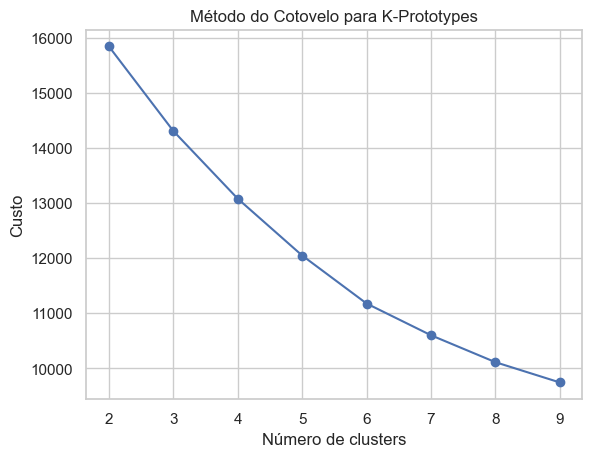

In [202]:
plt.plot(K, costs, marker='o')
plt.xlabel('Número de clusters')
plt.ylabel('Custo')
plt.title('Método do Cotovelo para K-Prototypes')
plt.grid(True)
plt.show()

Como pode observar, o custo menor seria para k = 9. O nosso banco, originalmente, apresenta 7 grupos de obesidade. Abaixo, como sugestão da LM, foi feito a PCA no banco, a fim de diminuir a dimensionalidade e ter um vislumbre dos clusters criados em 2D para ver se o agrupamento faz sentido.

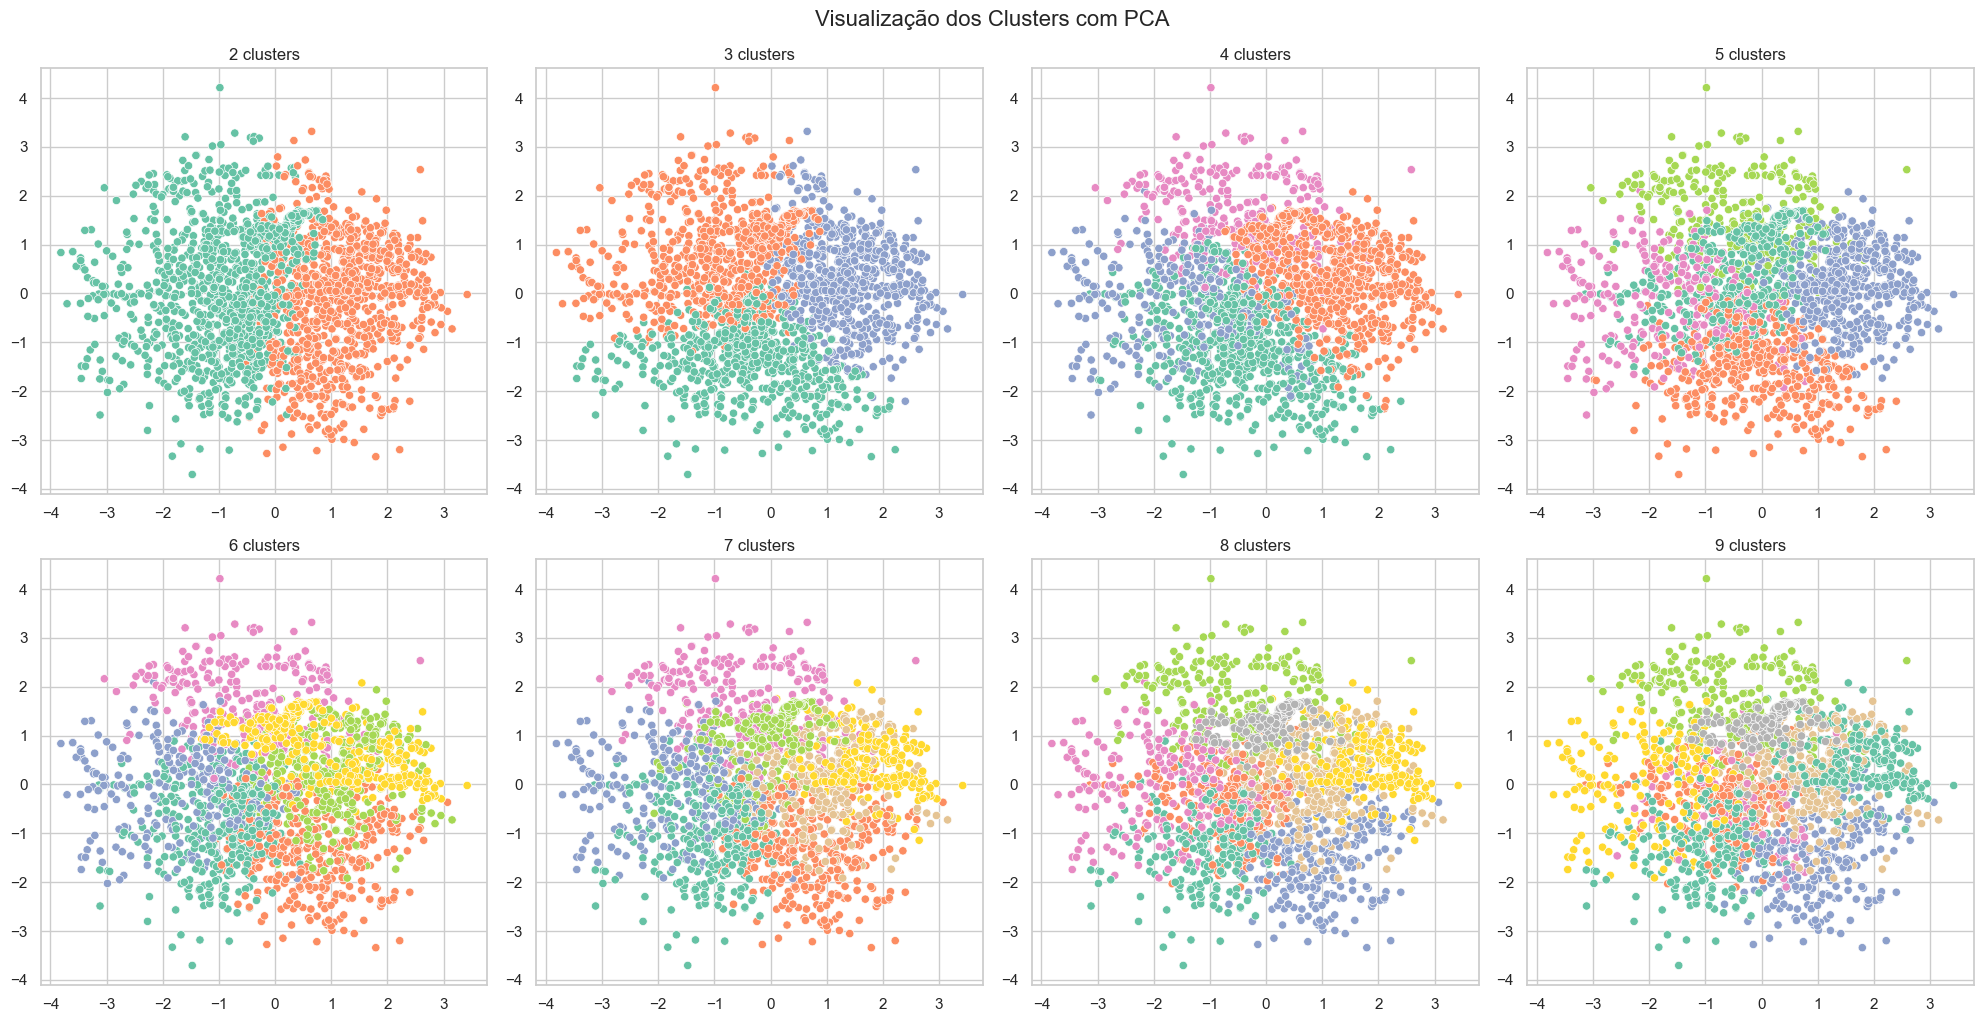

In [203]:
from sklearn.decomposition import PCA

# PCA nos dados numéricos
pca_2 = PCA(n_components=2)
X_pca = pca_2.fit_transform(df_scaled[numerical_cols])
pca_df = pd.DataFrame(X_pca, columns=["PC1", "PC2"])

fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()

for i, k in enumerate(range(2, 10)):
    cluster_col = f'cluster{k}'
    pca_df['cluster'] = df_sem_obesity[cluster_col].astype(str)

    sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='cluster',
                    palette='Set2', ax=axes[i], legend=False)
    axes[i].set_title(f'{k} clusters')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    
plt.tight_layout()
plt.suptitle("Visualização dos Clusters com PCA", fontsize=16, y=1.02)
plt.show()

Aparentemente, parece que os dados plotados com a PCA não são agrupáveis. Abaixo, segue a variância explicada pelas 2 componentes. Importante dizer que a LM sugeriu fazer PCA apenas com as variáveis numéricas, ignorando as variáveis categóricas. Então a variância explicada das 2 componentes leva em consideração somente as variáveis numéricas.

In [204]:
explained_variance = pca_2.explained_variance_ratio_
print(f"Variância explicada pelas 2 componentes principais: {sum(explained_variance) * 100:.2f}%")

Variância explicada pelas 2 componentes principais: 41.31%


## 7. Conclusão

A LM apresentou bom desempenho para escrever códigos na linguagem desejada (Python). Fez boas sugetões de tratamento do banco, como a padronização e utilização de um algotítmo que leva em consideração variáveis categóricas para fins de clusterização. Porém, não forneceu medidas satisfatórias de avaliação do cluster, apenas a métrica custo que é vaga. Essa métrica serve para comparar entre os k clusters executados, aquele que apresenta menor custo, mas não me diz se o agrupamento em si é bom. Também, falhou ao sugerir que fizesse PCA apenas para variáveis numéricas e ignorasse as variáveis categóricas. O motivo do erro se deve ao fato de parte da variabilidade do banco também ser explicado por essas variáveis categóricas. Logo, a visualização de clusters em 2 dimensões com apenas as variáveis numéricas é insuficiente.

Para a fase 3, as variáveis categóricas serão transformadas em dummys. Depois serão aplicadas PCA que explique pelo menos 80% da variabilidade e, após, serão aplicados algorítmos do tipo puro (que lida com o banco numérico), como KMeans e DBSCAN. Depois, serão aplicadas métricas de avaliação dos agrupamentos para os algorítmos e escolhido aquele que possuir melhor desempenho. E, após a clusterização, em PCA com 2 componentes serão plotados as observações para tentativa de verificar os agrupamentos. Essa tentativa de visualização pode ser insuficiente caso as componentes expliquem pouco a variabilidade dos dados e, portanto, a visualização deve ser ignorada.

**Link da conversa LM:** https://chatgpt.com/share/683cb440-5fe4-8005-b807-6113242945f4